# Skeleton plots that shows the synapse placement of all 7 clusters by module on the oviINr arbor
Steps in this file:
- Import skeleton, using 2d skeletons segments (kind of buggy)
- Import partition data for input connectome
- Import synapse location data
- Process dataframes so that synapse location and cluster are on the same dataframe
- Assign colors with a dictionary and then map
- Plot segments and synapses with legend

Written by Rhessa Weber Langstaff

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bokeh
import bokeh.palettes
from bokeh.plotting import figure, output_notebook, show, output_file, gridplot
from bokeh.io import export_svg, export_png
from bokeh.models import Legend, LegendItem
import os
from neuprint import Client


auth_token_file = open("/Users/rweberla/flybrain-clustering-rhessa/flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

output_notebook()

Loading BokehJS ...

In [3]:
# Create skeleton for later usage (inspired from Prof G.'s notebook ovi_specs_sandbox.ipynb)
# body Ids of oviINs
ovi_r = 423101189
ovi_l = 485934965
ovis = [ovi_r, ovi_l]

# cretae skeleton for both oviINs
skeletons = []

s = np_client.fetch_skeleton(ovi_r, format='pandas')
s['bodyId'] = ovi_r
s['color'] = bokeh.palettes.Greys[3][1]
skeletons.append(s)

skeletons = pd.concat(skeletons, ignore_index=True)

In [6]:
# Join parent nodes
segments = skeletons.merge(skeletons, left_on=['bodyId', 'link'], right_on=['bodyId', 'rowId'], suffixes=['_child', '_parent'])

# import full connectome data and location data
ovi_node_df  = pd.read_csv('/Users/rweberla/Downloads/0-0_98765.txt', header=None, sep=' ', names=['id', "0.0"])

# Import synapse location data for pre-synaptic sites
ovi_pre_syns = pd.read_csv('data/ovi_pre_syns.csv')

ovi_pre_syns

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       988567837    423101189  LAL(R)   LAL(R)  23100  27659  23824   23074   
3       987842109    423101189  SMP(R)   SMP(R)  19041  33090  14598   19047   
4       987273073    423101189  CRE(R)   CRE(R)  19347  27826  15348   19351   
...           ...          ...     ...      ...    ...    ...    ...     ...   
21619  1006928515    423101189      IB       IB  22664  14840  19749   22651   
21620  1005952640    423101189      IB       IB  21998  15625  18990   22007   
21621  1005952640    423101189      IB       IB  22998  15275  23049   23014   
21622  1005952640    423101189      IB       IB  23034  15380  23131   23048   
21623  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  confidence_pre  confidence_post type_pre type_post  
0       34624   17464           0.998         0.633171     FB5V     oviIN  
1       31112   21693           0.969         0.528840     FB5V     oviIN  
2       27659   23801           0.970         0.459446     FB4G     oviIN  
3       33072   14598           0.973         0.974019      NaN     oviIN  
4       27806   15376           0.943         0.595921      NaN     oviIN  
...       ...     ...             ...              ...      ...       ...  
21619   14823   19757           0.994         0.865103    CL300     oviIN  
21620   15603   18991           0.996         0.929040    IB058     oviIN  
21621   15272   23060           0.835         0.780000    IB058     oviIN  
21622   15364   23146           0.986         0.905853    IB058     oviIN  
21623   16879   21874           0.993         0.868024    CL229     oviIN  

[21624 rows x 14 columns]

In [7]:
# edit dataframes for easy merging
ovi_clusters = ovi_node_df[['id', '0.0']].copy()
ovi_locs = ovi_pre_syns[['bodyId_pre', 'x_post', 'y_post', 'z_post']].copy()

# merge synapse data onto cluster data
ovi_plotting = ovi_clusters.merge(ovi_locs, left_on='id', right_on='bodyId_pre').drop(columns='bodyId_pre')
ovi_plotting

id  0.0  x_post  y_post  z_post
0      1003215282    1   24282   16879   21874
1      1005952640    2   22007   15603   18991
2      1005952640    2   23014   15272   23060
3      1005952640    2   23048   15364   23146
4      1006928515    3   22651   14823   19757
...           ...  ...     ...     ...     ...
18777   987117151    2   17185   30699   23308
18778   987273073    6   19351   27806   15376
18779   988567837    5   23074   27659   23801
18780   988909130    5   19509   31112   21693
18781   989228019    5   22825   34624   17464

[18782 rows x 5 columns]

In [8]:
# Create color dictionary where each number in column 0.0 is assigned a color
#colors = ['', '#', '#e7cf57', '#ff6a88', '#', '#', '#9fad2b']
color_dict = {1: '#4e90d3', 2: '#9467bd', 3: '#e7cf57', 4: '#ff6a88', 5: '#5cc9ff', 6: '#3a9f82', 7: '#9fad2b'}

# Merge color dictionary onto dataframe
ovi_plotting['color'] = ovi_plotting['0.0'].map(color_dict)
ovi_plotting

id  0.0  x_post  y_post  z_post    color
0      1003215282    1   24282   16879   21874  #4e90d3
1      1005952640    2   22007   15603   18991  #9467bd
2      1005952640    2   23014   15272   23060  #9467bd
3      1005952640    2   23048   15364   23146  #9467bd
4      1006928515    3   22651   14823   19757  #e7cf57
...           ...  ...     ...     ...     ...      ...
18777   987117151    2   17185   30699   23308  #9467bd
18778   987273073    6   19351   27806   15376  #3a9f82
18779   988567837    5   23074   27659   23801  #5cc9ff
18780   988909130    5   19509   31112   21693  #5cc9ff
18781   989228019    5   22825   34624   17464  #5cc9ff

[18782 rows x 6 columns]

In [9]:
# Plot the skeleton plot so it just shows one cluster at a time, should be 7 plots
#clusters = [1, 2, 3, 4, 5, 6, 7]
def cluster_nt(df, cluster_list, all_one=False):
    if all_one:
        fig, ax = plt.subplots(3,3,figsize=(18, 18))
        for i, cluster in enumerate(cluster_list):
            ax[int(i /3), i % 3].invert_yaxis()  # Flip the y-axis 
            # drop y axis
            ax[int(i / 3), i % 3].set_yticks([])
            ax[int(i / 3), i % 3].set_xticks([])
            df_x = df[df['0.0']==cluster]
            for index, row in segments.iterrows():
                ax[int(i / 3), i % 3].plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)
            # Plot skeleton 6 times, each time with a different cluster
            ax[int(i / 3), i % 3].scatter(df_x['x_post'], df_x['z_post'], color=df_x["color"], s=1, zorder=10)
            # Set title for the subplot
            ax[int(i / 3), i % 3].set_title('Cluster ' + str(cluster))
    else:
    # Create a new plot for each cluster
        for cluster in cluster_list:
            # create plot with two subplots
            fig, ax = plt.subplots(1, 2, figsize=(18, 9))
            ax[0].invert_yaxis()
            ax[1].invert_yaxis()
            # drop axis
            ax[0].set_yticks([])
            ax[0].set_xticks([])

            # drop axis
            ax[1].set_yticks([])
            ax[1].set_xticks([])

            df_x = df[df['0.0']==cluster]
            for index, row in segments.iterrows():
                ax[0].plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)
                ax[1].plot([row['y_child'], row['y_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)

            # Plot skeleton 6 times, each time with a different cluster
            ax[0].scatter(df_x['x_post'], df_x['z_post'], color=df_x["color"], s=5, zorder=10)
            ax[1].scatter(df_x['y_post'], df_x['z_post'], color=df_x["color"], s=5, zorder=10)
            # Set title for the subplot
            ax[0].set_title('Cluster ' + str(cluster) + ' (front)')
            ax[1].set_title('Cluster ' + str(cluster) + ' (lateral)')







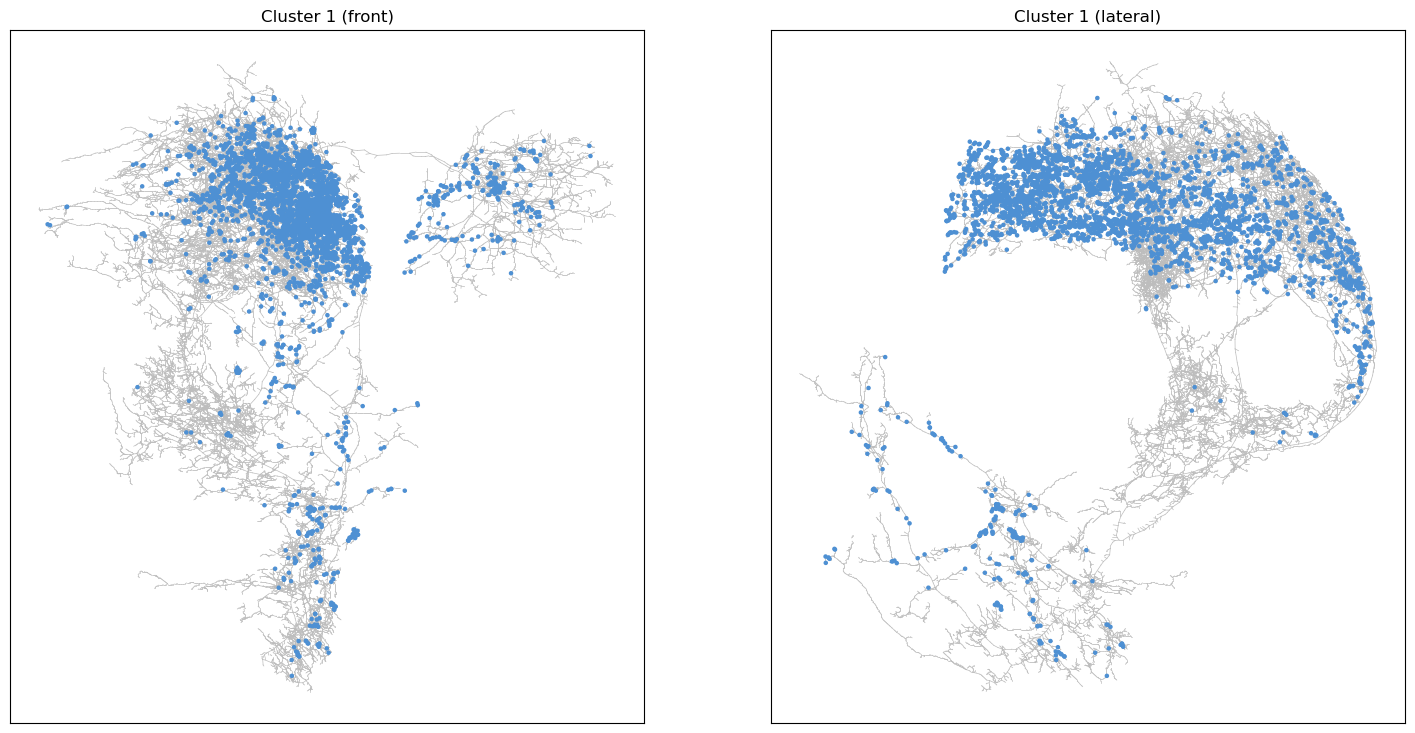

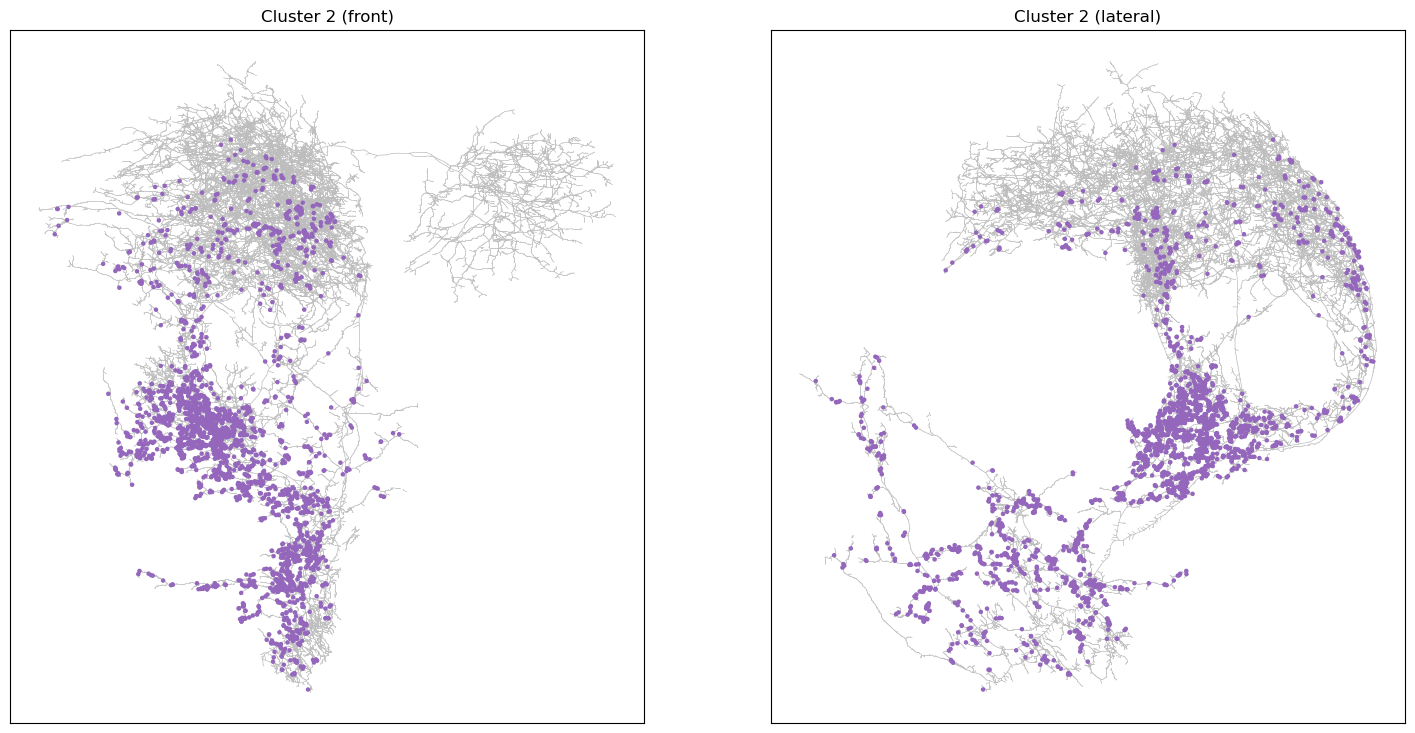

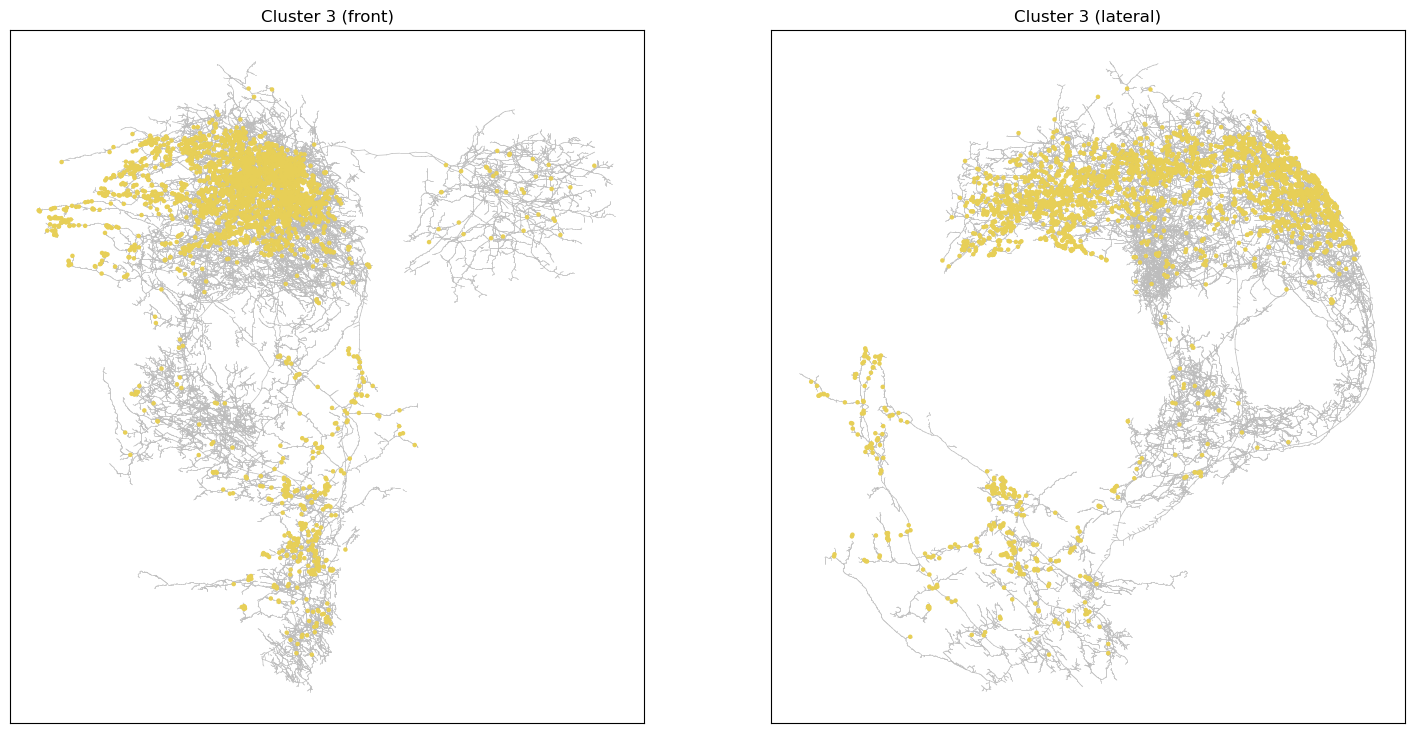

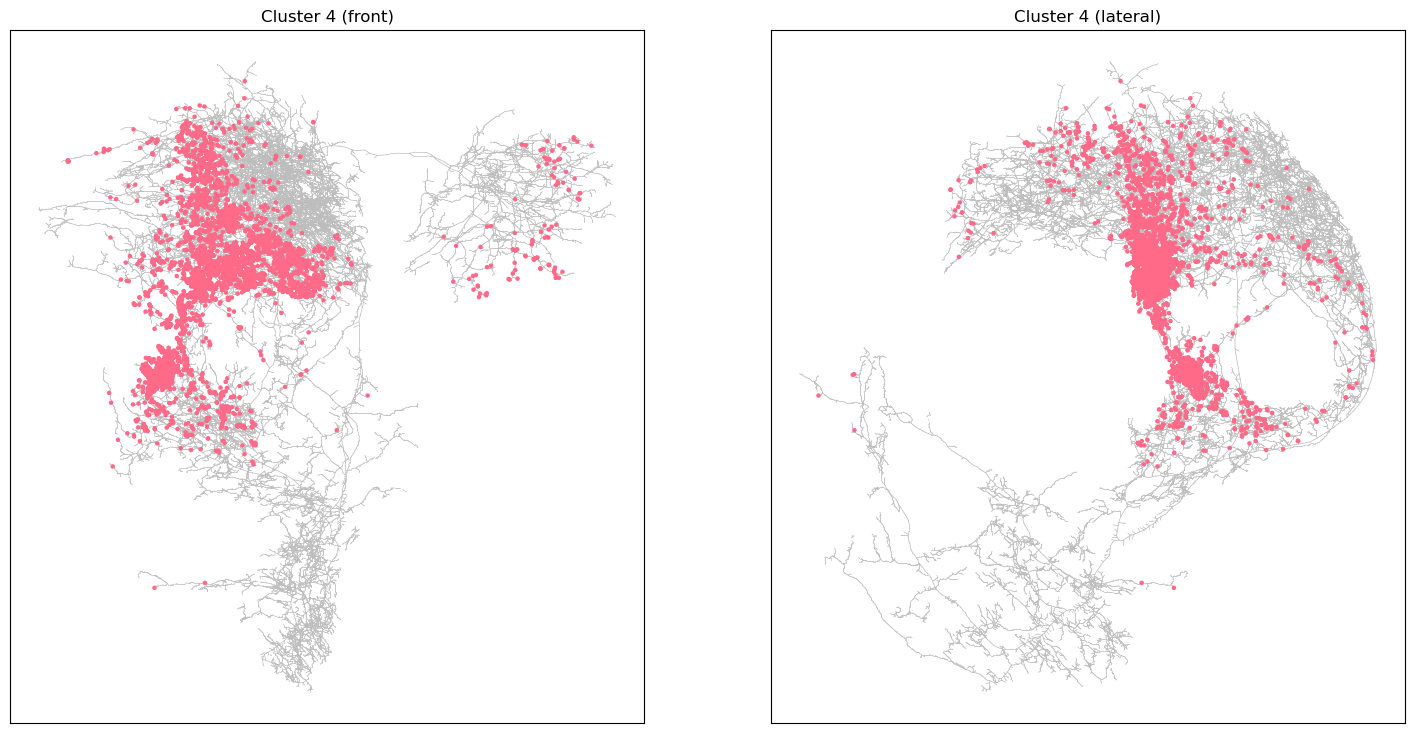

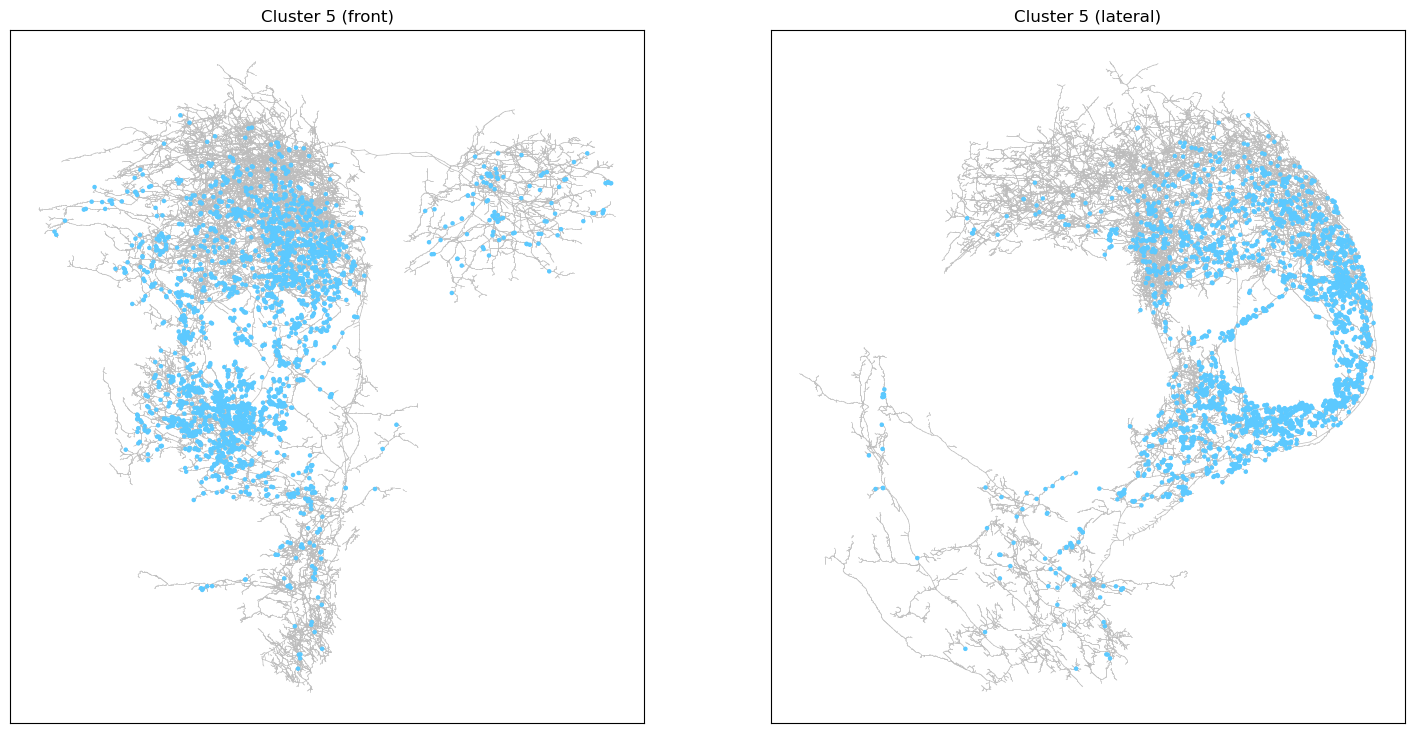

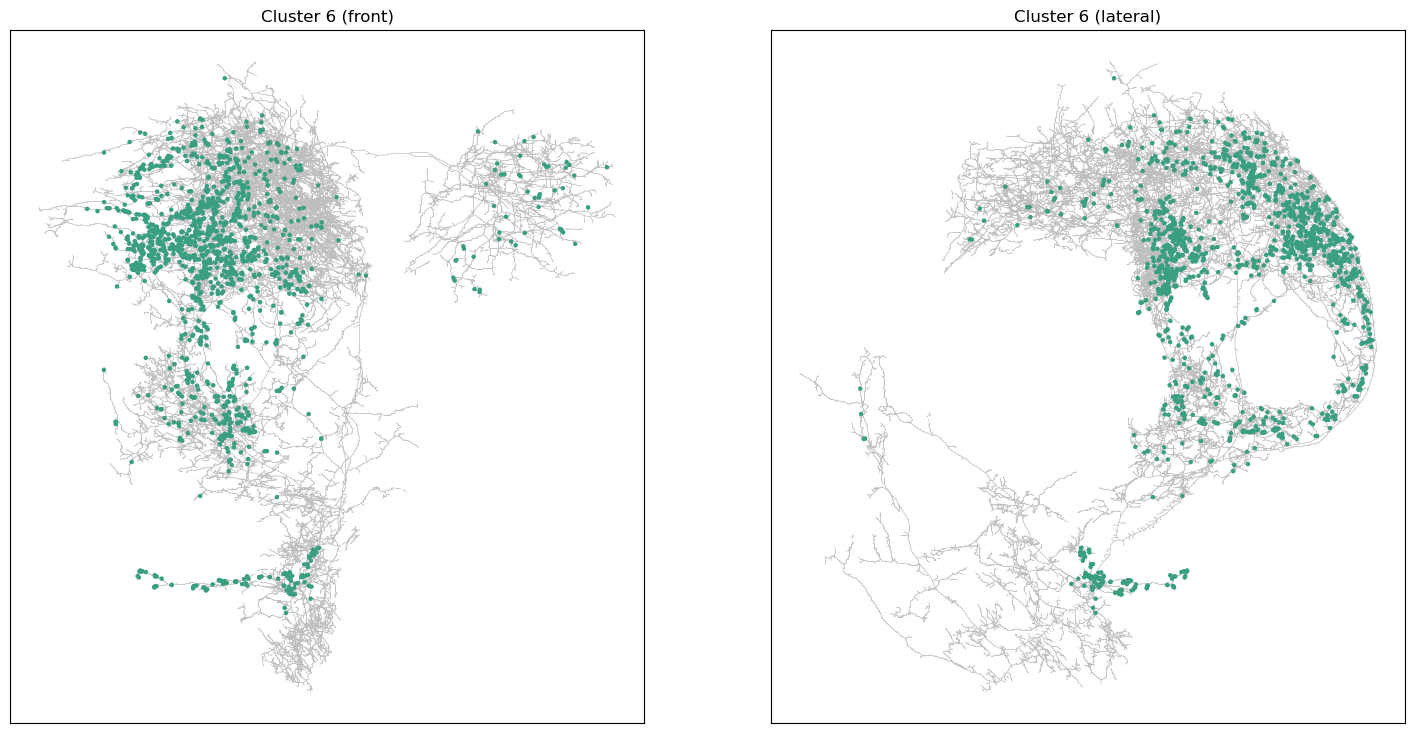

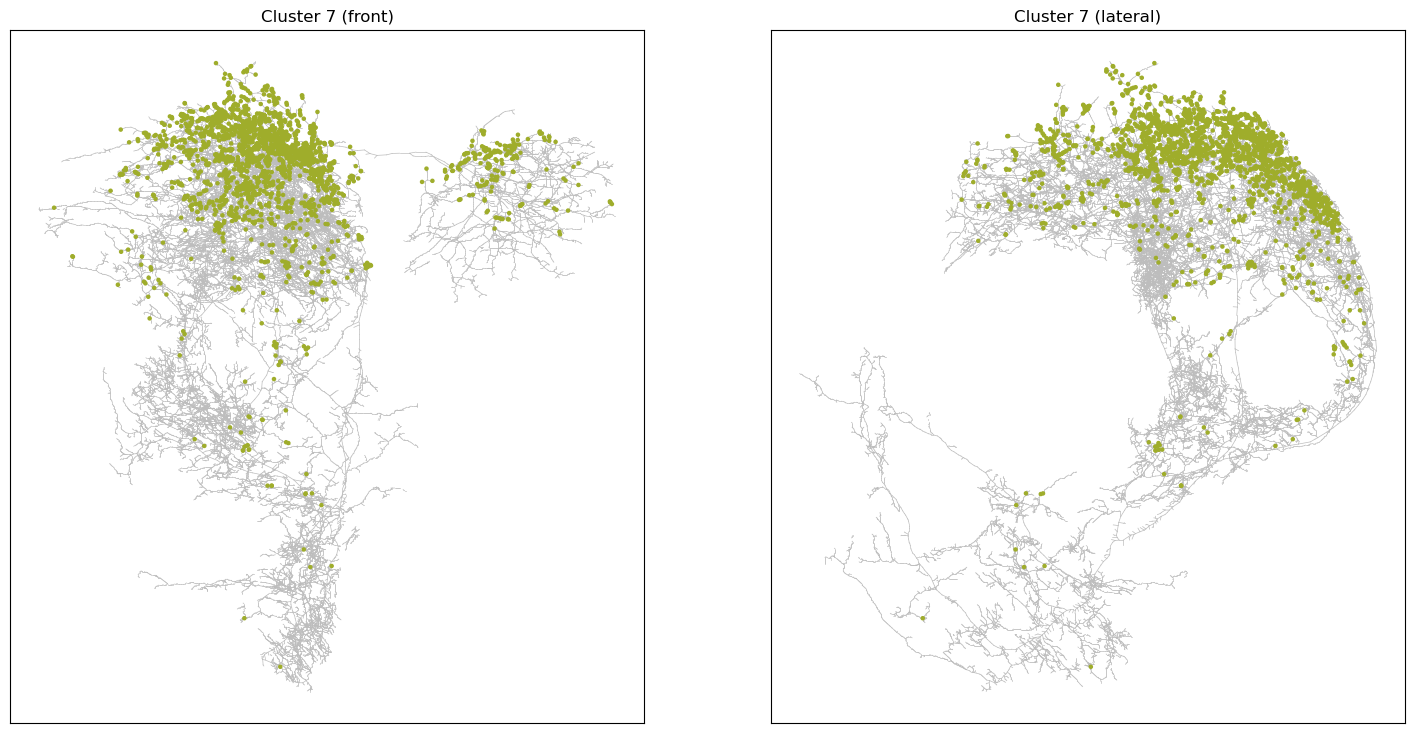

In [10]:
# Plot the skeleton plot so it just shows one cluster at a time, should be 7 plots
clusters = [1 ,2, 3, 4, 5, 6, 7]

cluster_nt(ovi_plotting, clusters)